# Import Libraries and Images

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(900, 1600, 3)
900 1600
(25560, 3)


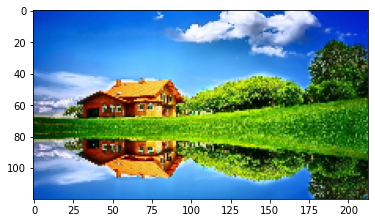

In [2]:
im = cv2.imread('C:\\Users\\deepu\\Downloads\\img.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#matplotlib work in RGB and cv2 in BGR
print(im.shape)
r, c = im.shape[:2]
print(r,c)
out_r = 120
im = cv2.resize(im, (int(out_r*float(c)/r), out_r)) #reduce the size of image
pixels = im.reshape((-1, 3))#convert matrix into single array or list flattening
 
print(pixels.shape)
plt.imshow(im);

In [3]:
km = KMeans(n_clusters=8)#how many cluster of different cluster you want
km.fit(pixels)

KMeans()

In [4]:
colors = np.asarray(km.cluster_centers_, dtype='uint8') #centers of different cluster
print(colors)

[[210 195  58]
 [ 24 102 211]
 [120 180  29]
 [ 20  45   8]
 [195 216 240]
 [ 88 164 235]
 [ 57 117  20]
 [138  47  11]]


In [5]:
per = np.asarray(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
per = per / pixels.shape[0]
per #per holding the fraction of each different color

array([0.06420188, 0.21948357, 0.10798122, 0.14178404, 0.10379499,
       0.20559467, 0.11983568, 0.03732394], dtype=float32)

# Dominant Colors

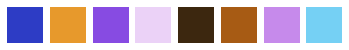

In [6]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3),dtype='uint8') #multidimentional metrics     
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis("off")
    plt.imshow(patch)

In [7]:
dom = [[per[ix], colors[ix]] for ix in range(km.n_clusters)]
DOM = sorted(dom, key=lambda z: z[0], reverse=True)#find the reverse order of dominant colors
DOM

[[0.21948357, array([ 24, 102, 211], dtype=uint8)],
 [0.20559467, array([ 88, 164, 235], dtype=uint8)],
 [0.14178404, array([20, 45,  8], dtype=uint8)],
 [0.11983568, array([ 57, 117,  20], dtype=uint8)],
 [0.10798122, array([120, 180,  29], dtype=uint8)],
 [0.10379499, array([195, 216, 240], dtype=uint8)],
 [0.06420188, array([210, 195,  58], dtype=uint8)],
 [0.037323944, array([138,  47,  11], dtype=uint8)]]

# Dominance

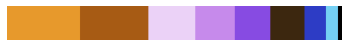

In [8]:
plt.figure(0)
plt.axis('off')
patch = np.zeros((50, 500, 3),dtype='uint8')
start = 0
for cx in range(km.n_clusters):
    width = int(DOM[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - DOM[cx][1]
    start = end
plt.imshow(patch)
plt.show()

In [9]:
for px in range(pixels.shape[0]):
    for ix in range(colors.shape[0]):
        pixels[px] =colors[km.labels_[px]]

In [10]:
img = pixels.reshape(out_r, -1, 3)
print(img.shape)

(120, 213, 3)


# Image Regeneration with k centers

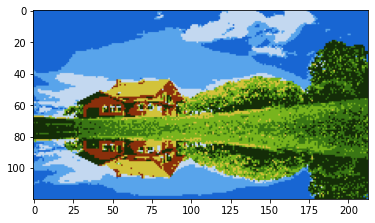

In [11]:
plt.imshow(img);